<a href="https://colab.research.google.com/github/ch-chiu/insurance_prediction/blob/main/Machine_Learning_for_Business_and_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import dataset to colab

In [ ]:
import pandas as pd

def load_insurance_data():
  url = "https://raw.githubusercontent.com/ch-chiu/insurance_prediction/main/InsuranceDataset.csv"
  return pd.read_csv(url)

insurance_data = load_insurance_data()


# Take a Quick Look at the Data Structure



In [ ]:
# view the imported data
insurance_data

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,"72,433"
1,55.0,female,South NT,29.5,2.0,no,occasional,"79,358"
2,53.0,female,North NT,26.0,0.0,no,frequent,"67,628"
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,"7,020"
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,"82,368"
...,...,...,...,...,...,...,...,...
1336,56.0,male,Hong Kong Island,38.5,0.0,no,no,"73,688"
1337,24.0,female,North NT,32.1,0.0,no,occasional,"17,955"
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   float64
 1   sex          1338 non-null   object 
 2   home         1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   children     1335 non-null   float64
 5   smoker       1338 non-null   object 
 6   drinking     1338 non-null   object 
 7   past claims  1338 non-null   object 
dtypes: float64(3), object(5)
memory usage: 83.9+ KB


In [ ]:
insurance_data["past claims"] = insurance_data["past claims"].str.replace(',', '').astype(float)
insurance_data.describe()

,age,bmi,children,past claims
count,1338.000000,1338.000000,1335.000000,1338.000000
mean,39.281764,29.738341,1.093633,90388.195815
std,14.207480,6.109329,1.205092,84782.257933
min,18.000000,14.800000,0.000000,3374.000000
25%,27.000000,25.400000,0.000000,30353.750000
50%,39.000000,29.500000,1.000000,63390.000000
75%,51.000000,33.600000,2.000000,113611.000000
max,119.000000,52.100000,5.000000,442160.000000


In [ ]:
insurance_data["past claims"].isnull().sum()

3

# Create Test Set

In [ ]:
# remove past claims is NaN data
insurance_data = insurance_data[insurance_data["past claims"].notnull()]

In [ ]:
# stratified sampling to avoid bias
import numpy as np
insurance_data["claims_cat"] = pd.cut(insurance_data["past claims"],
                                  bins=[0., 30000.0, 60000.0, 90000.0, 120000.0, np.inf],
                                  labels=[1,2,3,4,5])

from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    insurance_data, test_size=0.2, stratify=insurance_data["claims_cat"], random_state=42)

<ipython-input-8-64fe150be8c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data["claims_cat"] = pd.cut(insurance_data["past claims"],


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("claims_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

## Data cleaning to study correlations

In [ ]:
insurance_data_cleaning = insurance_data.copy()

In [ ]:
## change attribute to numerical data for linear regression
insurance_data_cleaning["children"] = insurance_data_cleaning["children"].fillna(0)

In [ ]:
# ordinalencoder sex, smoker, drinking
from sklearn.preprocessing import OrdinalEncoder
sex_encoder = OrdinalEncoder(categories=[['male','female']])
smoker_encoder = OrdinalEncoder(categories=[['no','yes']])
drinking_encoder = OrdinalEncoder(categories=[['no','occasional','frequent']])
sex = insurance_data_cleaning[["sex"]]
smoker = insurance_data_cleaning[["smoker"]]
drinking = insurance_data_cleaning[["drinking"]]
sex_encoded = sex_encoder.fit_transform(sex)
smoker_encoded = smoker_encoder.fit_transform(smoker)
drinking_encoded = drinking_encoder.fit_transform(drinking)

In [ ]:
insurance_data_cleaning["sex"] = sex_encoded
insurance_data_cleaning["smoker"] = smoker_encoded
insurance_data_cleaning["drinking"] = drinking_encoded

In [ ]:
from sklearn.preprocessing import OneHotEncoder

home_encoder = OneHotEncoder()
home = insurance_data_cleaning[["home"]]
home_encoded = home_encoder.fit_transform(home)

In [ ]:
home_encoded = home_encoded.toarray()

In [ ]:
home_encoded.shape

(1338, 4)

In [ ]:
home_encoder.categories_

[array(['Hong Kong Island', 'Kowloon', 'North NT', 'South NT'],
       dtype=object)]

In [ ]:
insurance_data_cleaning.drop(["home"], axis=1)
insurance_data_cleaning[['Hong Kong Island', 'Kowloon', 'North NT', 'South NT']] = home_encoded

In [ ]:
insurance_data_cleaning

,age,sex,home,bmi,children,smoker,drinking,past claims,claims_cat,Hong Kong Island,Kowloon,North NT,South NT
0,49.0,1.0,Kowloon,32.3,2.0,0.0,0.0,72433.0,3,0.0,1.0,0.0,0.0
1,55.0,1.0,South NT,29.5,2.0,0.0,1.0,79358.0,3,0.0,0.0,0.0,1.0
2,53.0,1.0,North NT,26.0,0.0,0.0,2.0,67628.0,3,0.0,0.0,1.0,0.0
3,19.0,0.0,Hong Kong Island,33.2,0.0,0.0,1.0,7020.0,1,1.0,0.0,0.0,0.0
4,59.0,0.0,Hong Kong Island,36.5,1.0,0.0,2.0,82368.0,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,19.0,1.0,Hong Kong Island,31.8,0.0,0.0,0.0,11676.0,1,1.0,0.0,0.0,0.0
1334,54.0,0.0,North NT,32.4,1.0,0.0,1.0,74355.0,3,0.0,0.0,1.0,0.0
1335,30.0,0.0,North NT,27.9,3.0,1.0,1.0,142256.0,5,0.0,0.0,1.0,0.0
1336,56.0,0.0,Hong Kong Island,38.5,0.0,0.0,0.0,73688.0,3,1.0,0.0,0.0,0.0


## Looking for Correlations

In [ ]:
corr_matrix = insurance_data_cleaning.corr()

In [ ]:
corr_matrix["past claims"].sort_values(ascending=False)

past claims         1.000000
smoker              0.787411
age                 0.290948
bmi                 0.198060
South NT            0.074435
children            0.068725
Kowloon             0.006248
drinking           -0.007813
North NT           -0.040564
Hong Kong Island   -0.042921
sex                -0.057878
Name: past claims, dtype: float64

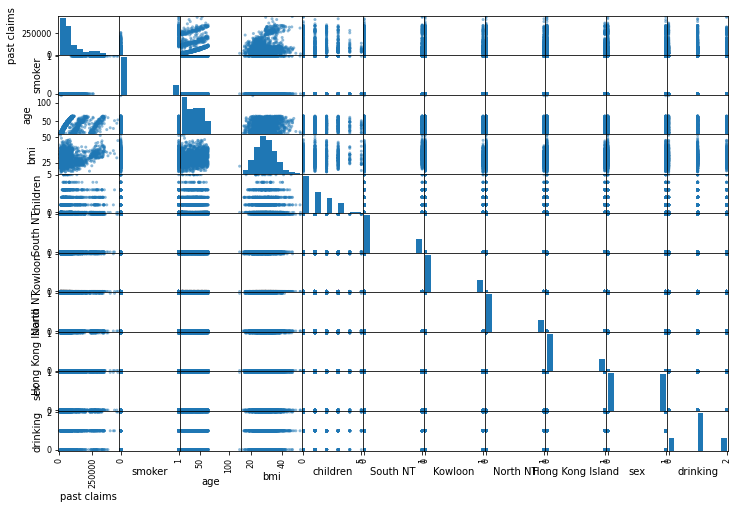

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


attributes = ["past claims", "smoker", "age", "bmi",
              "children", "South NT", "Kowloon", "North NT",
              "Hong Kong Island", "sex", "drinking"]
scatter_matrix(insurance_data_cleaning[attributes], figsize=(12, 8))
plt.show()

# Data preprocesssing

revert to the original training set and separate the target

In [ ]:
insurance = strat_train_set.drop("past claims", axis=1)
insurance_labels = strat_train_set["past claims"].copy()

## Data Cleaning

In [ ]:
insurance_num = insurance.select_dtypes(include=[np.number])

In [ ]:
# check for none value in numerical fields
insurance_num[insurance_num.isnull().any(axis=1)]

,age,bmi,children
464,61.0,38.4,NaN
1317,55.0,31.7,NaN
1077,22.0,34.1,NaN


In [ ]:
# remove NaN data
# insurance_data = insurance_data[insurance_data["past claims"].notnull()]
insurance["children"] = insurance["children"].fillna(0) # Option 3 – set the values to some value

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="constant", fill_value=0)

imputer.fit(insurance_num)
imputer.statistics_

array([0., 0., 0.])

## Handling Text and Categorical Attributes

In [ ]:
insurance_cat = insurance[["sex", "smoker", "drinking", "home"]]
insurance_cat_ordinal = insurance[["sex", "smoker", "drinking", "home"]]
insurance_cat_1hot = insurance[["home"]]
insurance_cat
# will use ordinal encoder on sex, smoker and drinking, one hot encoding on home
# please refer to Data cleaning to study correlations under Discover and Visualize the Data to Gain Insights

,sex,smoker,drinking,home
902,male,yes,occasional,South NT
612,female,no,occasional,South NT
611,female,no,occasional,Hong Kong Island
1139,male,no,frequent,Hong Kong Island
577,female,no,occasional,North NT
...,...,...,...,...
1023,male,no,occasional,North NT
821,male,no,no,Kowloon
1093,male,yes,occasional,South NT
729,female,yes,occasional,South NT


## Transformation Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ["age", "bmi", "children"]
cat_ordinal_attribs = ["drinking"]
cat_1hot_attribs = ["home", "sex", "smoker"]

num_attribs_2 = ["age", "bmi"]
cat_ordinal_attribs_2 = []
cat_1hot_attribs_2 = ["smoker"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value=0)),
    ("standardize", StandardScaler()),
])

cat_ordinal_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("ordinalEncode",OrdinalEncoder(categories=[['no','occasional','frequent']], handle_unknown="error")),
    ("standardize", StandardScaler())
])

cat_1hot_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("1hotEncode",OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_ordinal", cat_ordinal_pipeline, cat_ordinal_attribs),
    ("cat_1hot", cat_1hot_pipeline, cat_1hot_attribs),
])

preprocessing2 = ColumnTransformer([
    ("num", num_pipeline, num_attribs_2),
    ("cat_1hot", cat_1hot_pipeline, cat_1hot_attribs_2),
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalEncode',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'occasional',
                                                                              'frequent']])),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['drinking']),
                                ('cat_1hot',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('1hotEncode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['home', 'sex', 'smoker'])])

In [ ]:
preprocessing2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'bmi']),
                                ('cat_1hot',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('1hotEncode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['smoker'])])

In [ ]:
insurance_prepared = preprocessing.fit_transform(insurance)
insurance_prepared, insurance_prepared.shape

(array([[ 0.26282413,  1.21678153,  0.76194408, ...,  1.        ,
          0.        ,  1.        ],
        [ 0.33311201, -1.16932934,  0.76194408, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.31714236, -0.97454478, -0.91904595, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 0.82512718,  1.99591978,  0.76194408, ...,  1.        ,
          0.        ,  1.        ],
        [-0.72120622, -0.43888724, -0.07855094, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.38743024, -1.1206332 , -0.91904595, ...,  0.        ,
          0.        ,  1.        ]]), (1070, 12))

In [ ]:
strat_train_set.shape

(1070, 8)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>]], dtype=object)

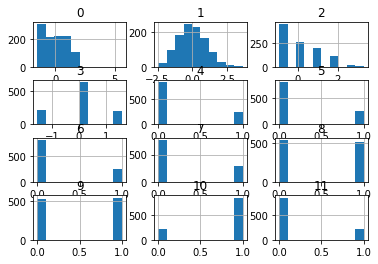

In [ ]:
pd.DataFrame(insurance_prepared).hist()

# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(insurance, insurance_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalEncode',
                                                                   OrdinalEncoder(categories=[['no',
                                                                                               'occasional',
                                                                                               'frequent']])),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['drinking']),
                                                 ('cat_1hot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hotEncode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home', 'sex', 'smoker'])])),
                ('linearregression', LinearRegression())])

In [ ]:
insurance_predictions = lin_reg.predict(insurance)
insurance_predictions[:5].round(-2)

array([249400.,  47900.,  68600.,  52900.,  33400.])

In [ ]:
insurance_labels.iloc[:5].values

array([294028.,  55219.,  80524.,  39614.,  28048.])

In [ ]:
error_ratios = insurance_predictions[:5].round(-2) / insurance_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-15.2%, -13.3%, -14.8%, 33.5%, 19.1%


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(insurance_labels, insurance_predictions,
                              squared=False)
lin_rmse

42935.03202700782

In [ ]:
# model_with_all_features
lin_reg['linearregression'].coef_, lin_reg['linearregression'].coef_

(array([ 24680.57106157,  14558.56830226,   4184.8324788 ,   -189.13519573,
         -1988.03510933,   5590.43478783,  -1075.12826698,  -2527.27141152,
          -247.56465778,    247.56465778, -83963.09286722,  83963.09286722]),
 array([ 24680.57106157,  14558.56830226,   4184.8324788 ,   -189.13519573,
         -1988.03510933,   5590.43478783,  -1075.12826698,  -2527.27141152,
          -247.56465778,    247.56465778, -83963.09286722,  83963.09286722]))

In [ ]:
# model_with_feature_with_correlation_greater_than_0.1
lin_reg_2 = make_pipeline(preprocessing2, LinearRegression())
lin_reg_2.fit(insurance, insurance_labels)
insurance_predictions_2 = lin_reg_2.predict(insurance)
lin_rmse_2 = mean_squared_error(insurance_labels, insurance_predictions_2,
                              squared=False)
print(f'RMSE: {lin_rmse_2}')
print(f"MODEL_2: {lin_reg_2['linearregression'].coef_}, {lin_reg_2['linearregression'].coef_}")

RMSE: 43255.730680688146
MODEL_2: [ 24856.69187606  14027.05159716 -83772.69812785  83772.69812785], [ 24856.69187606  14027.05159716 -83772.69812785  83772.69812785]


In [ ]:
lin_reg_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi']),
                                                 ('cat_1hot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hotEncode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home', 'sex', 'smoker'])])),
                ('linearregression', LinearRegression())])

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, insurance, insurance_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     43051.139344
std       4980.874194
min      34072.084025
25%      39796.897023
50%      42955.124751
75%      47088.283076
max      49247.551740
dtype: float64

In [ ]:
lin_rmses_2 = -cross_val_score(lin_reg_2, insurance, insurance_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses_2).describe()

count       10.000000
mean     43142.966898
std       5099.138801
min      34119.826679
25%      39541.294230
50%      43076.200698
75%      47328.611007
max      49779.727467
dtype: float64

# Evalution on Testing Set

In [ ]:
X_test = strat_test_set.drop("past claims", axis=1)
y_test = strat_test_set["past claims"].copy()

final_predictions = lin_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

40969.78811254085


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([35439.19930546, 45837.86893564])